<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-11-02 10:39:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  24.1MB/s    in 1.5s    

2021-11-02 10:39:11 (24.1 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


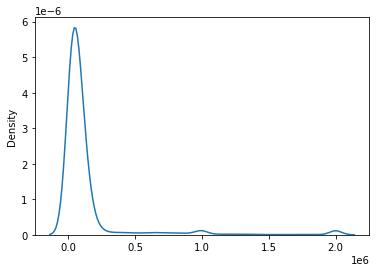

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()
sns.distplot(df, 'ConvertedComp', hist = False, kde = True)

plt.show()

### Box Plots


Plot a box plot of `Age.`


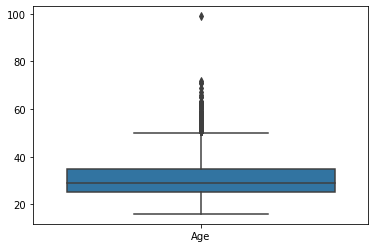

In [28]:
# your code goes here

QUERYbox = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERYbox,conn)
df.head()
sns.boxplot(data=df)

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


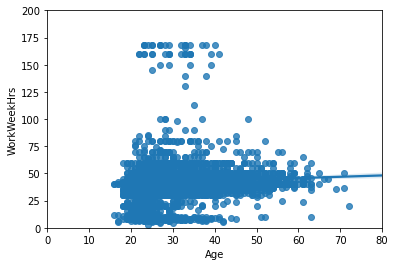

In [27]:
# your code goes here
QUERYscatter = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERYscatter,conn)
df.head()


sns.regplot(x="Age", y="WorkWeekHrs", data=df)
plt.ylim(0,200)
plt.xlim(0,80)

plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


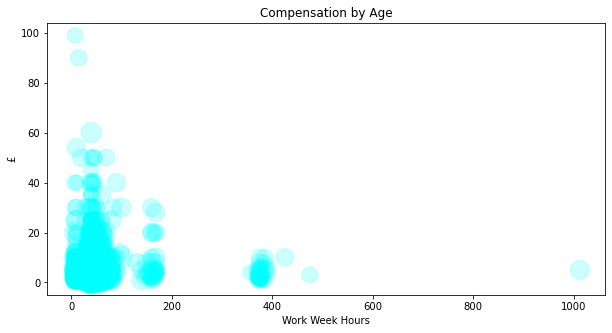

In [38]:
# your code goes here

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
QUERYbubble = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERYbubble,conn)
df.head()


plt.figure(figsize=(10,5))
plt.scatter(x=df.WorkWeekHrs, y=df.CodeRevHrs, c='cyan', alpha=0.2, s=df.Age*10)
plt.xlabel('Work Week Hours') 
plt.ylabel('£') 
plt.title('Compensation by Age') 
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x7f349d3cc460>,
 [Text(1.1736914154044327, 1.1597191303957783, 'PostgreSQL'),
  Text(-0.9921837807065633, 1.3183593384592953, 'MongoDB'),
  Text(-1.5602426637717488, -0.536789372236856, 'Redis'),
  Text(-0.08034500476514456, -1.6480426815496283, 'MySQL'),
  Text(1.4365316698453372, -0.8117122405947613, 'Elasticsearch')],
 [Text(0.6401953174933268, 0.6325740711249699, '24.8%'),
  Text(-0.5411911531126707, 0.71910509370507, '20.9%'),
  Text(-0.8510414529664083, -0.292794203038285, '19.1%'),
  Text(-0.043824548053715204, -0.8989323717543425, '18.8%'),
  Text(0.7835627290065474, -0.4427521312335061, '16.4%')])

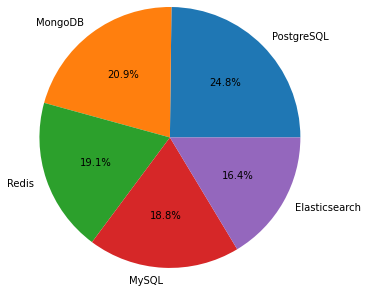

In [24]:
# your code goes here

Querypie="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""

DatabaseDesireNextYear= pd.read_sql_query(Querypie, conn)
x = DatabaseDesireNextYear['count']
label = DatabaseDesireNextYear['DatabaseDesireNextYear']
plt.pie(x, labels=label, autopct='%1.1f%%',radius=1.5)


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


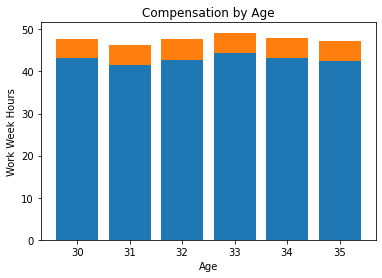

In [41]:
# your code goes here

Querystack = """
SELECT Avg(WorkWeekHrs), Avg(CodeRevHrs), Age 
FROM master 
where Age between 30 and 35
group by Age
"""

df_stack = pd.read_sql_query(Querystack, conn)
WorkWeekHrs= df_stack['Avg(WorkWeekHrs)']
CodeRevHrs= df_stack['Avg(CodeRevHrs)']
Age= df_stack['Age']

fig, ax = plt.subplots()

ax.bar(Age, WorkWeekHrs, label='WorkWeekHrs')
ax.bar(Age, CodeRevHrs, bottom=WorkWeekHrs,
       label='CodeRevHrs')
plt.xlabel('Age') 
plt.ylabel('Work Week Hours') 
plt.title('Compensation by Age') 
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


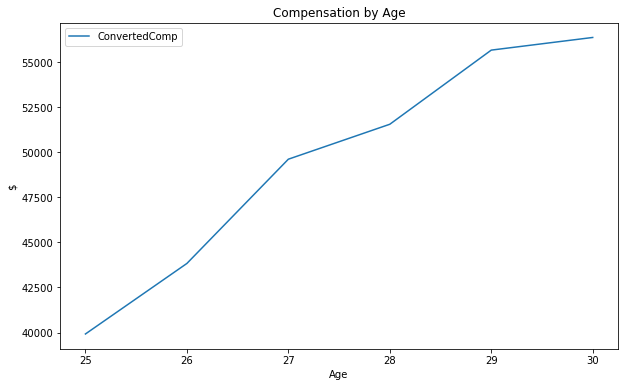

In [32]:
# your code goes here

QUERYline = """
SELECT ConvertedComp, Age
FROM master
"""
df_med = pd.read_sql_query(QUERYline,conn) 


df_med = df_med.groupby('Age', axis=0).median()


df_med[25:30].plot(kind='line', figsize=(10, 6), stacked=True)

plt.xlabel('Age') 
plt.ylabel('$') 
plt.title('Compensation by Age') 

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


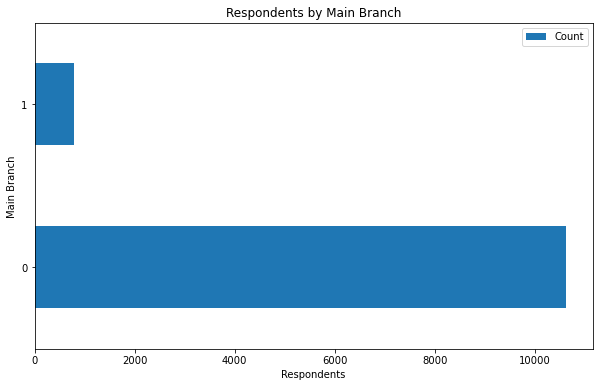

In [33]:
# your code goes here
QUERYbar = """
SELECT MainBranch, count(MainBranch) as Count
FROM master
GROUP BY MainBranch
"""
df_main = pd.read_sql_query(QUERYbar,conn) 
df_main.head()


df_main.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Respondents')
plt.ylabel('Main Branch') 
plt.title('Respondents by Main Branch') 
plt.show()


Close the database connection.


In [44]:
table_name = 'DevType'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

#step 1: get the data needed
QUERY = """
SELECT DevType, count(DevType) as Count
FROM DevType
GROUP BY DevType
"""
df_type = pd.read_sql_query(QUERY,conn) 
df_type = df_type.sort_values('Count', ascending=False)
df_type.head()
conn.close()

ProgrammingError: Cannot operate on a closed database.

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
